In [1]:
import numpy as np
import pandas as pd
import scipy

In [2]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.landscapes import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

#

# Universal parameters

In [4]:
# h = 1
# consumption_rates = np.array([h, h, h, h, h, 0, 0, 0, 0])  # for all types
# # viz.matrix_plot(consumption_rates, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [5]:
# m = 1e-9
# mutation_rates = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])  # Apf
# # viz.matrix_plot(mutation_rates, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [6]:
# # l = 0 # 1e-7
# segregation_rates = np.array([0, 0, 0, 0, 0, l, 0, 0, 0])  # for all types
# # viz.matrix_plot(segregation_rates, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [7]:
# # beta  = 1e-16
# alpha = 1
# transfer_rates_donor = np.array([0, 0, 0, 0, 0, beta, 0, 0, 0])  # for all types
# transfer_rates_recip = np.array([0, 0, 0, 0, 0, alpha, 0, 0, 0])  # for all types
# # viz.matrix_plot(transfer_rates_donor, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)
# # viz.matrix_plot(transfer_rates_recip, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [8]:
# linkage = {5: [6, 7, 8]}

In [9]:
#                        #  segregant:  { attributes of segregant }
# segregant_overrides = { '011000...': {'traits': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0]), 'mutation_rate': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])},
#                         '001100...': {'traits': np.array([0, 0, 0, 0, 1, 0, 0, 0, 0]), 'mutation_rate': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])} }

In [10]:
#                          # transconjugant: { attributes of transconjugant }
# transconjugant_overrides = { '100001...': {'traits': {'traits': [0, 1, 2, 3, 4], 'values': np.array([0, 1, 1, 0, 0])}},
#                              '000011...': {'traits': {'traits': [0, 1, 2, 3, 4], 'values': np.array([0, 0, 1, 1, 0])}} }

In [11]:
                       # h  h  h  h  h   t   m  m  m
traits_init = np.array([[1, 0, 0, 0, 0,  0,  0, 0, 0],   # pf|A
                        [0, 1, 1, 0, 0,  1,  0, 0, 0],   # pc|A
                        [0, 0, 1, 1, 0,  1,  0, 0, 0],   # pc|B
                        [0, 0, 0, 0, 1,  0,  0, 0, 0]])  # pf|B
# viz.matrix_plot(traits_init, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [12]:
lineageIDs = ['Apf', 'Aanc', 'Banc', 'Bpf']

In [13]:
h = 1
consumption_rates = np.array([h, h, h, h, h, 0, 0, 0, 0])  # for all types
# viz.matrix_plot(consumption_rates, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [14]:
m = 1e-9
mutation_rates = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0],   # pf|A 
                           [0, 0, 0, 0, 0, 0, m, m, m],   # pc|A
                           [0, 0, 0, 0, 0, 0, m, m, m],   # pc|B
                           [0, 0, 0, 0, 0, 0, 0, 0, 0]])  # pf|B
# viz.matrix_plot(mutation_rates, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [15]:
l = 0 # 1e-7
segregation_rates = np.array([0, 0, 0, 0, 0, l, 0, 0, 0])  # for all types
# viz.matrix_plot(segregation_rates, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [16]:
beta  = 1e-16
alpha = 1
transfer_rates_donor = np.array([0, 0, 0, 0, 0, beta, 0, 0, 0])  # for all types
transfer_rates_recip = np.array([0, 0, 0, 0, 0, alpha, 0, 0, 0])  # for all types
# viz.matrix_plot(transfer_rates_donor, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)
# viz.matrix_plot(transfer_rates_recip, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [17]:
linkage = {5: [6, 7, 8]}

In [18]:
                       #  segregant:  { attributes of segregant }
segregant_overrides = { '011000...': {'traits': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0]), 'mutation_rate': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])},
                        '001100...': {'traits': np.array([0, 0, 0, 0, 1, 0, 0, 0, 0]), 'mutation_rate': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])} }

In [19]:
                         # transconjugant: { attributes of transconjugant }
transconjugant_overrides = { '100001...': {'traits': {'traits': [0, 1, 2, 3, 4], 'values': np.array([0, 1, 1, 0, 0])}},
                             '000011...': {'traits': {'traits': [0, 1, 2, 3, 4], 'values': np.array([0, 0, 1, 1, 0])}} }

In [20]:
cost_baseline = 0.1

In [21]:
N = 3
K = 0

In [22]:
landscape_hostA = NKLandscape(N=N, K=K, seed=67)
display(landscape_hostA.genotype_fitnesses)

{'000': 0.8040561057067969,
 '001': 0.7875642314646695,
 '010': 0.6465308714882542,
 '011': 0.6300389972461269,
 '100': 0.7389835549496024,
 '101': 0.7224916807074752,
 '110': 0.5814583207310596,
 '111': 0.5649664464889325}

In [23]:
landscape_hostB = NKLandscape(N=N, K=K, seed=858)
display(landscape_hostB.genotype_fitnesses)

{'000': 0.7315685487395694,
 '001': 0.6408336836099634,
 '010': 0.5257349589995871,
 '011': 0.435000093869981,
 '100': 0.6259306511991731,
 '101': 0.5351957860695671,
 '110': 0.4200970614591908,
 '111': 0.3293621963295848}

In [24]:
landscape = merge_landscapes(landscape_hostA.genotype_fitnesses, landscape_hostB.genotype_fitnesses, prefix_A='011001', prefix_B='001101')  # prefixes = traits for pc|A and pc|B

In [25]:
landscape.update({'100000000': max(landscape_hostA.genotype_fitnesses.values()),   # pf|A
                  '000010000': max(landscape_hostB.genotype_fitnesses.values())})  # pf|B

In [26]:
landscape

{'011001000': 0.8040561057067969,
 '011001001': 0.7875642314646695,
 '011001010': 0.6465308714882542,
 '011001011': 0.6300389972461269,
 '011001100': 0.7389835549496024,
 '011001101': 0.7224916807074752,
 '011001110': 0.5814583207310596,
 '011001111': 0.5649664464889325,
 '001101000': 0.7315685487395694,
 '001101001': 0.6408336836099634,
 '001101010': 0.5257349589995871,
 '001101011': 0.435000093869981,
 '001101100': 0.6259306511991731,
 '001101101': 0.5351957860695671,
 '001101110': 0.4200970614591908,
 '001101111': 0.3293621963295848,
 '100000000': 0.8040561057067969,
 '000010000': 0.7315685487395694}

In [27]:
carrying_capacity = 1e9

# Species A plasmid-free pool

In [28]:
#                        # h  h  h  h  h   t   m  m  m
# traits_init = np.array([[1, 0, 0, 0, 0,  0,  0, 0, 0]])  # Apf
# # viz.matrix_plot(traits_init, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [29]:
# lineageIDs = ['Apf']

In [30]:
N_init = [1, 0, 0, 0]

In [31]:
R_init = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0])
# viz.matrix_plot(R_init, vmin=0, vmax=1, cbar=False, linecolor='lightgray', linewidths=1)

In [32]:
influx_rates = np.zeros_like(R_init)
influx_rates[R_init > 0] = 1
# viz.matrix_plot(influx_rates, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [33]:
community_envApf = Community(traits=traits_init, cost_landscape=landscape, cost_baseline=cost_baseline,
                      consumption_rate=consumption_rates, influx_rate=influx_rates, carrying_capacity=carrying_capacity, 
                      mutation_rate=mutation_rates, segregation_rate=segregation_rates, transfer_rate_donor=transfer_rates_donor, transfer_rate_recip=transfer_rates_recip,
                      segregant_overrides=segregant_overrides, transconjugant_overrides=transconjugant_overrides,
                      segregation_linkage=linkage, transfer_linkage=linkage,
                      lineageIDs=lineageIDs, lineageID_traits=[6, 7, 8],
                      N_init=N_init, R_init=R_init, seed=2)

In [34]:
T_total = 1e4

In [35]:
community_envApf.run(T=T_total)

In [36]:
cmapA = viz.lightdark_cmap('crimson', cmin=0.1, cmax=0.95, reverse=True)
cmapB = viz.lightdark_cmap('royalblue', cmin=0.1, cmax=0.95, reverse=True)
xconj_cmaps = [viz.lightdark_cmap(sns.color_palette('gnuplot2', as_cmap=True)(np.arange(0.45, 1.0, 0.1)[n-1]), cmin=0.1, cmax=0.95, reverse=True) for n in range(1, 7)]
# display(cmapA)
# display(cmapB)
# for cmap in xconj_cmaps: display(cmap)

In [37]:
type_colors, type_hatches = viz.type_styles_by_phylogeny(community_envApf.type_set, color_tags={'A': cmapA, 'B': cmapB, 't': {n+1: cmapT for n, cmapT in enumerate(xconj_cmaps)}}, hatch_tags={'s': '///', 'pf': '///'}, 
                                                         vmin=min(landscape.values()), vmax=max(landscape.values()) )

<AxesSubplot: >

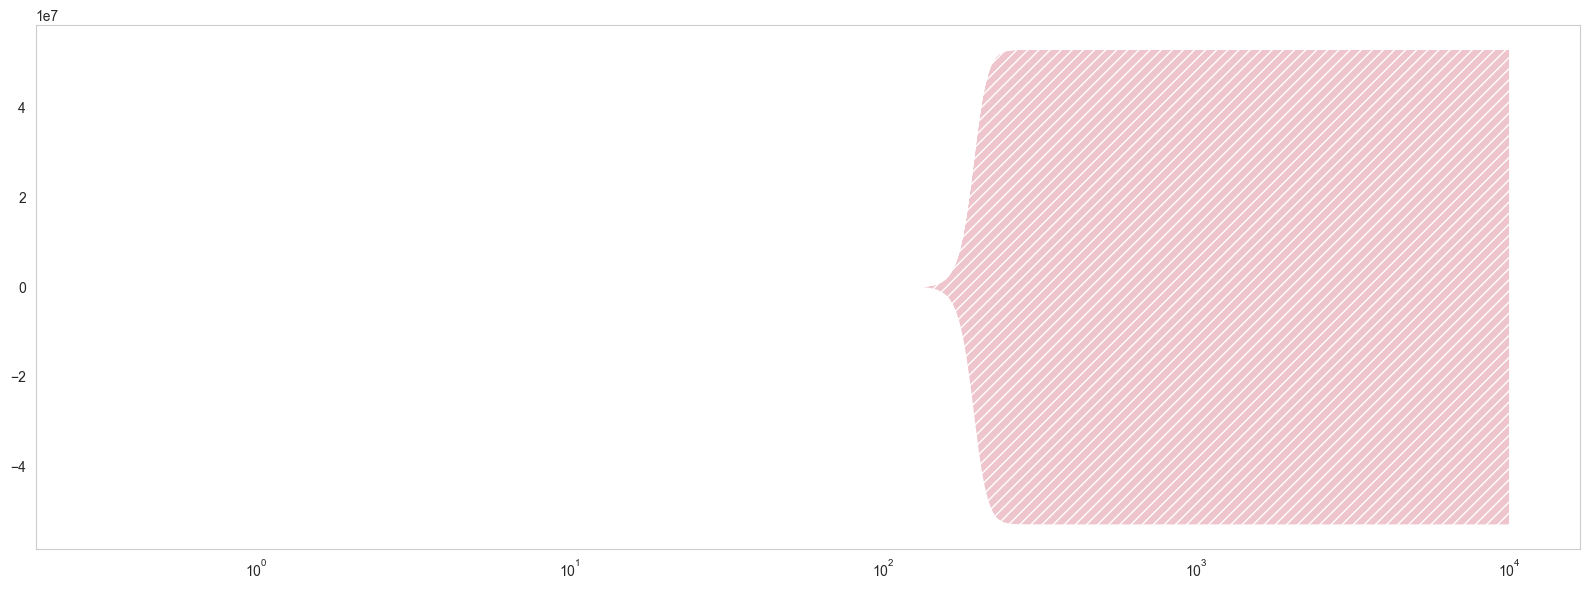

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
viz.abundance_plot(community_envApf, ax=ax, type_colors=type_colors, type_hatches=type_hatches, relative_abundance=False, stacked=True, baseline='sym', log_x_axis=True, log_y_axis=False)

<AxesSubplot: >

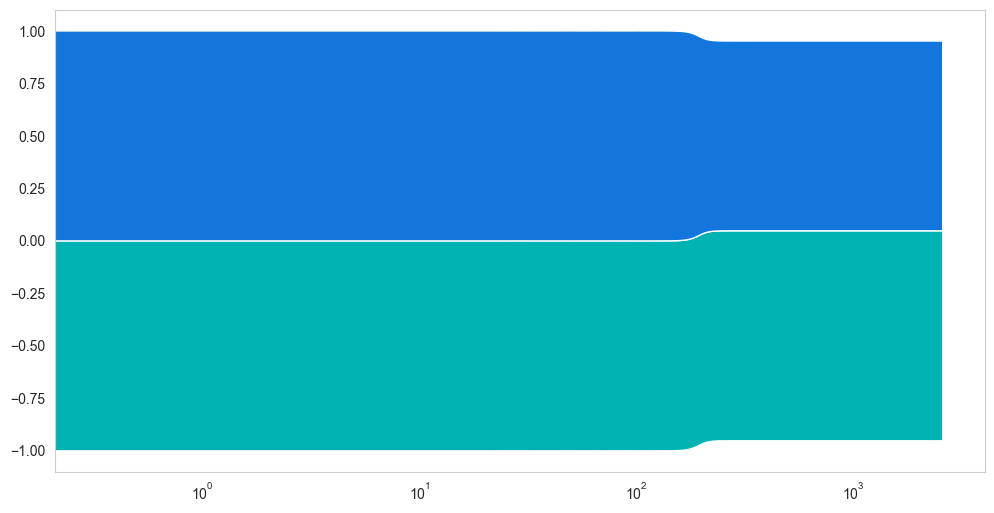

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
viz.resource_plot(community_envApf, ax=ax, stacked=True, relative=False, log_x_axis=True, log_y_axis=False)

# Species B plasmid-free pool

In [40]:
#                        # h  h  h  h  h   t   m  m  m
# traits_init = np.array([[0, 0, 0, 0, 1,  0,  0, 0, 0]])  # Apf
# # viz.matrix_plot(traits_init, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [41]:
# lineageIDs = ['Bpf']

In [42]:
N_init = np.array([0, 0, 0, 1])

In [43]:
R_init = np.array([0, 0, 0, 1, 1, 0, 0, 0, 0])
# viz.matrix_plot(R_init, vmin=0, vmax=1, cbar=False, linecolor='lightgray', linewidths=1)

In [44]:
influx_rates = np.zeros_like(R_init)
influx_rates[R_init > 0] = 1
# viz.matrix_plot(influx_rates, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [45]:
community_envBpf = Community(traits=traits_init, cost_landscape=landscape, cost_baseline=cost_baseline,
                      consumption_rate=consumption_rates, influx_rate=influx_rates, carrying_capacity=carrying_capacity, 
                      mutation_rate=mutation_rates, segregation_rate=segregation_rates, transfer_rate_donor=transfer_rates_donor, transfer_rate_recip=transfer_rates_recip,
                      segregant_overrides=segregant_overrides, transconjugant_overrides=transconjugant_overrides,
                      segregation_linkage=linkage, transfer_linkage=linkage,
                      lineageIDs=lineageIDs, lineageID_traits=[6, 7, 8],
                      N_init=N_init, R_init=R_init, seed=2)

In [46]:
T_total = 1e4

In [47]:
community_envBpf.run(T=T_total)

In [48]:
cmapA = viz.lightdark_cmap('crimson', cmin=0.1, cmax=0.95, reverse=True)
cmapB = viz.lightdark_cmap('royalblue', cmin=0.1, cmax=0.95, reverse=True)
xconj_cmaps = [viz.lightdark_cmap(sns.color_palette('gnuplot2', as_cmap=True)(np.arange(0.45, 1.0, 0.1)[n-1]), cmin=0.1, cmax=0.95, reverse=True) for n in range(1, 7)]
# display(cmapA)
# display(cmapB)
# for cmap in xconj_cmaps: display(cmap)

In [49]:
type_colors, type_hatches = viz.type_styles_by_phylogeny(community_envBpf.type_set, color_tags={'A': cmapA, 'B': cmapB, 't': {n+1: cmapT for n, cmapT in enumerate(xconj_cmaps)}}, hatch_tags={'s': '///', 'pf': '///'}, 
                                                         vmin=min(landscape.values()), vmax=max(landscape.values()) )

<AxesSubplot: >

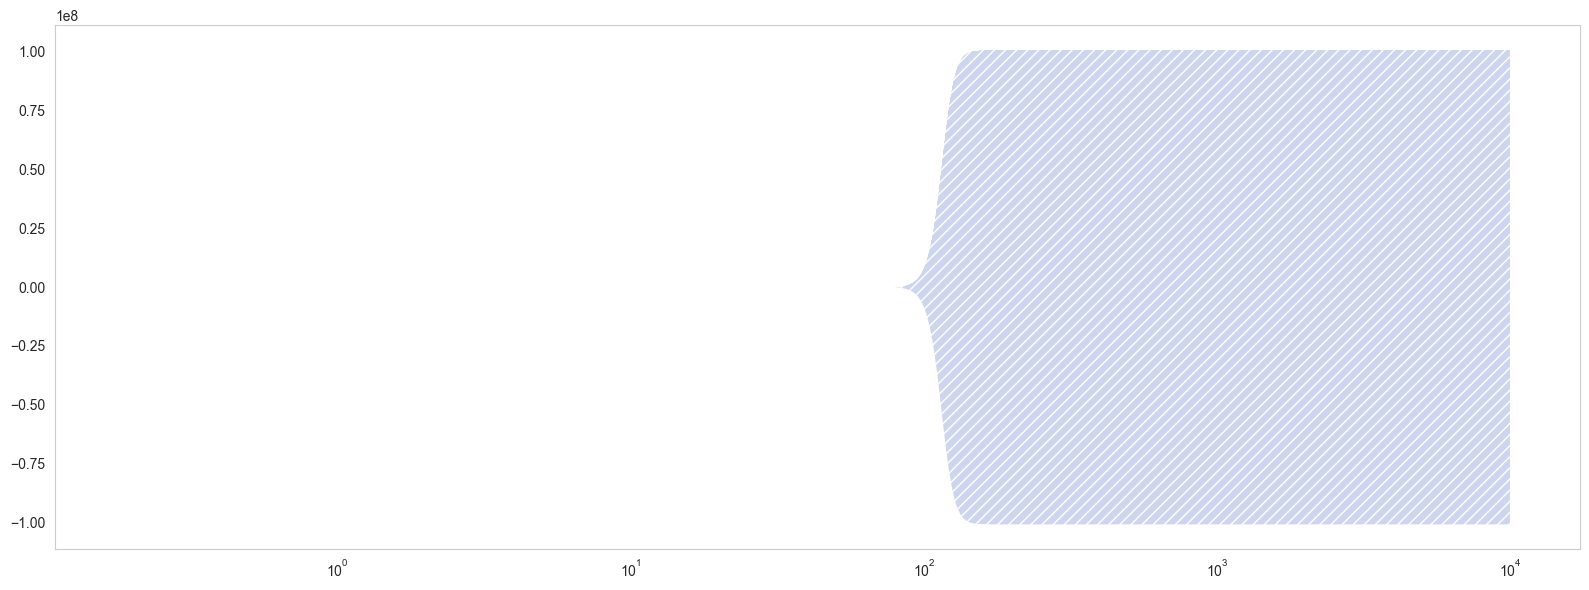

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
viz.abundance_plot(community_envBpf, ax=ax, type_colors=type_colors, type_hatches=type_hatches, relative_abundance=False, stacked=True, baseline='sym', log_x_axis=True, log_y_axis=False)

<AxesSubplot: >

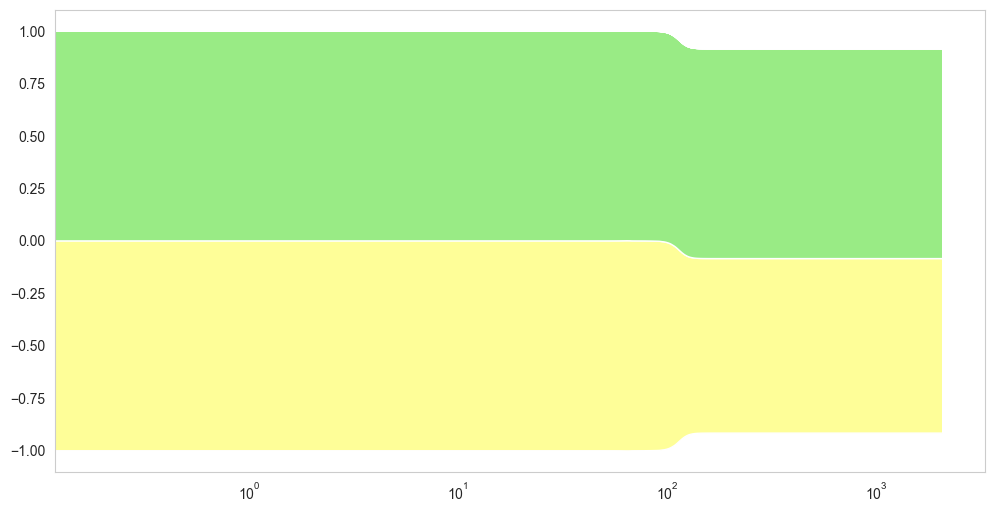

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
viz.resource_plot(community_envBpf, ax=ax, stacked=True, relative=False, log_x_axis=True, log_y_axis=False)

# Scenario Phase A1

In [52]:
#                        # h  h  h  h  h   t   m  m  m
# traits_init = np.array([[1, 0, 0, 0, 0,  0,  0, 0, 0],   # Apf
#                         [0, 1, 0, 0, 0,  1,  0, 0, 0]])  # Apc
# # viz.matrix_plot(traits_init, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [53]:
# lineageIDs = ['Apf', 'Apc']

In [54]:
N_init = np.array([1e8, 1e8, 0, 0])

In [55]:
R_init = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0])
# viz.matrix_plot(R_init, vmin=0, vmax=1, cbar=False, linecolor='lightgray', linewidths=1)

In [56]:
influx_rates = np.zeros_like(R_init)
influx_rates[R_init > 0] = 1
# viz.matrix_plot(influx_rates, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [57]:
community_envA1 = Community(traits=traits_init, cost_landscape=landscape, cost_baseline=cost_baseline,
                      consumption_rate=consumption_rates, influx_rate=influx_rates, carrying_capacity=carrying_capacity, 
                      mutation_rate=mutation_rates, segregation_rate=segregation_rates, transfer_rate_donor=transfer_rates_donor, transfer_rate_recip=transfer_rates_recip,
                      segregant_overrides=segregant_overrides, transconjugant_overrides=transconjugant_overrides,
                      segregation_linkage=linkage, transfer_linkage=linkage,
                      lineageIDs=lineageIDs, lineageID_traits=[6, 7, 8],
                      N_init=N_init, R_init=R_init, seed=2)

In [58]:
T_total = 1e4

In [59]:
community_envA1.run(T=T_total)

[ Mutant established at t=183.26 ]	011001000 --> 011001010
[ Mutant established at t=298.69 ]	011001010 --> 011001110
[ Mutant established at t=420.13 ]	011001010 --> 011001110
[ Transconjugant established at t=563.70 ]	011001110+100000000 --> 011001110
[ Mutant established at t=1330.77 ]	011001110 --> 011001111


In [60]:
cmapA = viz.lightdark_cmap('crimson', cmin=0.1, cmax=0.95, reverse=True)
cmapB = viz.lightdark_cmap('royalblue', cmin=0.1, cmax=0.95, reverse=True)
xconj_cmaps = [viz.lightdark_cmap(sns.color_palette('gnuplot2', as_cmap=True)(np.arange(0.45, 1.0, 0.1)[n-1]), cmin=0.1, cmax=0.95, reverse=True) for n in range(1, 7)]
# display(cmapA)
# display(cmapB)
# for cmap in xconj_cmaps: display(cmap)

In [61]:
type_colors, type_hatches = viz.type_styles_by_phylogeny(community_envA1.type_set, color_tags={'A': cmapA, 'B': cmapB, 't': {n+1: cmapT for n, cmapT in enumerate(xconj_cmaps)}}, hatch_tags={'s': '///', 'pf': '///'}, 
                                                         vmin=min(landscape.values()), vmax=max(landscape.values()) )

<AxesSubplot: >

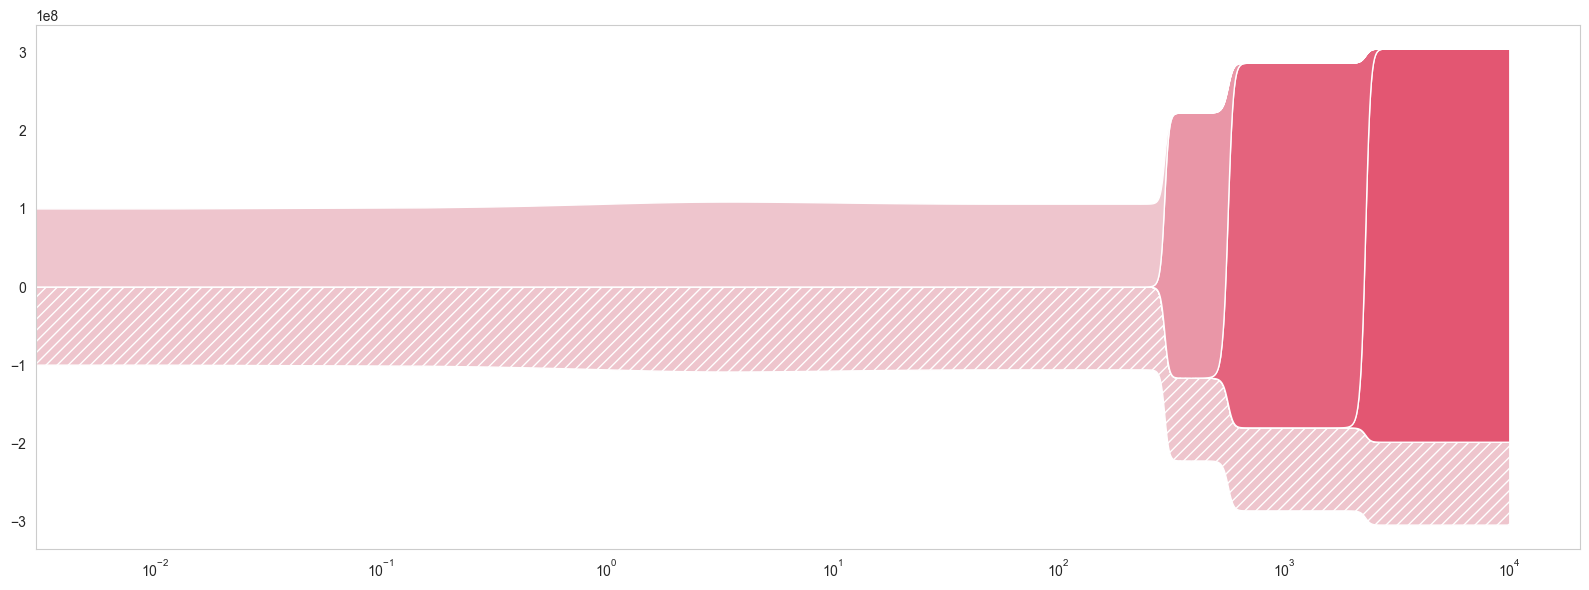

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
viz.abundance_plot(community_envA1, ax=ax, type_colors=type_colors, type_hatches=type_hatches, relative_abundance=False, stacked=True, baseline='sym', log_x_axis=True, log_y_axis=False)

<AxesSubplot: >

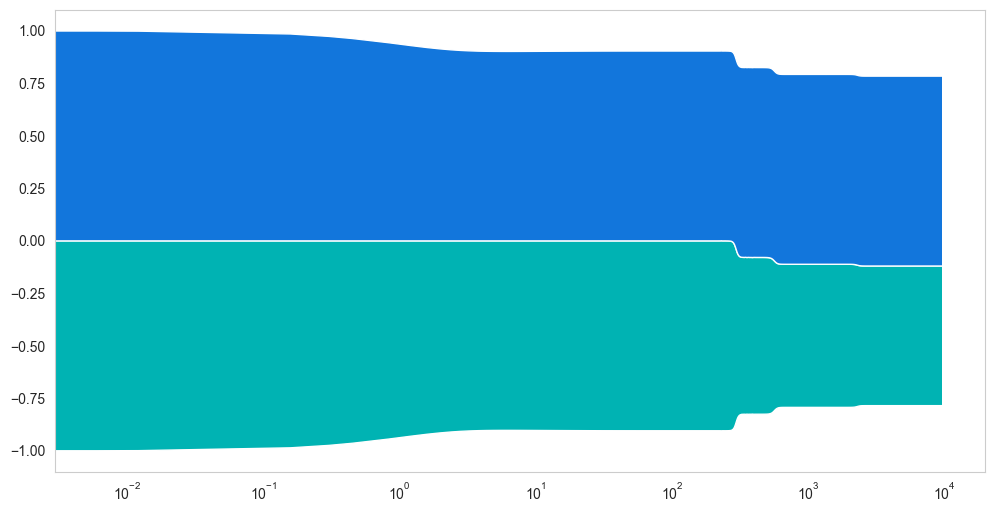

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
viz.resource_plot(community_envA1, ax=ax, stacked=True, relative=False, log_x_axis=True, log_y_axis=False)

# Scenario Phase B2

In [64]:
community_envB2 = community_envBpf.sample(fraction=1.0).inoculate(community_envA1.sample(fraction=1.0))

In [65]:
T_total = 1e4

In [66]:
community_envB2.run(T=T_total)

[ Transconjugant established at t=0.54 ]	011001111+000010000 --> 001101000
[ Transconjugant established at t=0.95 ]	011001111+000010000 --> 001101000
[ Transconjugant established at t=1.13 ]	011001111+000010000 --> 001101000
[ Transconjugant established at t=1.39 ]	011001111+000010000 --> 001101000
[ Transconjugant established at t=1.53 ]	011001111+000010000 --> 001101000


In [67]:
community_envB2.R_series

array([[ 9.04056106e-01,  9.04001494e-01,  9.03946886e-01, ...,
         5.00142586e-31,  1.54371354e-34, -8.02035002e-32],
       [ 6.64966446e-01,  6.64911836e-01,  6.64857230e-01, ...,
         1.60451670e-31,  4.95241603e-35, -2.57302335e-32],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [68]:
community_envB2.type_set.lineageIDs

['Aanc[000].m1[010].m1[110].m1[111]',
 'Apf[000]',
 'Bpf[000]',
 'Bpf[000].t1(dAanc[000]-m1[010]-m1[110]-m1[111])',
 'Bpf[000].t2(dAanc[000]-m1[010]-m1[110]-m1[111])',
 'Bpf[000].t3(dAanc[000]-m1[010]-m1[110]-m1[111])',
 'Bpf[000].t4(dAanc[000]-m1[010]-m1[110]-m1[111])',
 'Bpf[000].t5(dAanc[000]-m1[010]-m1[110]-m1[111])']

In [69]:
community_envB2.N_series

array([[5.03835276e+08, 5.03835274e+08, 5.03835271e+08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.06126039e+08, 1.06126039e+08, 1.06126038e+08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.02546683e+08, 2.02546683e+08, 2.02546683e+08, ...,
        2.02546683e+08, 2.02546683e+08, 2.02546683e+08],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.02935736e+07, 4.02935736e+07, 4.02935736e+07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.85511365e+07, 3.85511365e+07, 3.85511365e+07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.76758641e+07, 3.76758641e+07, 3.76758641e+07]])

In [70]:
cmapA = viz.lightdark_cmap('crimson', cmin=0.1, cmax=0.95, reverse=True)
cmapB = viz.lightdark_cmap('royalblue', cmin=0.1, cmax=0.95, reverse=True)
xconj_cmaps = [viz.lightdark_cmap(sns.color_palette('gnuplot2', as_cmap=True)(np.arange(0.45, 1.0, 0.1)[n-1]), cmin=0.1, cmax=0.95, reverse=True) for n in range(1, 7)]

In [71]:
type_colors, type_hatches = viz.type_styles_by_phylogeny(community_envB2.type_set, color_tags={'A': cmapA, 'B': cmapB, 't': {n+1: cmapT for n, cmapT in enumerate(xconj_cmaps)}}, hatch_tags={'s': '///', 'pf': '///'}, vmin=min(landscape.values()), vmax=max(landscape.values()), palette_depth=1 )

<AxesSubplot: >

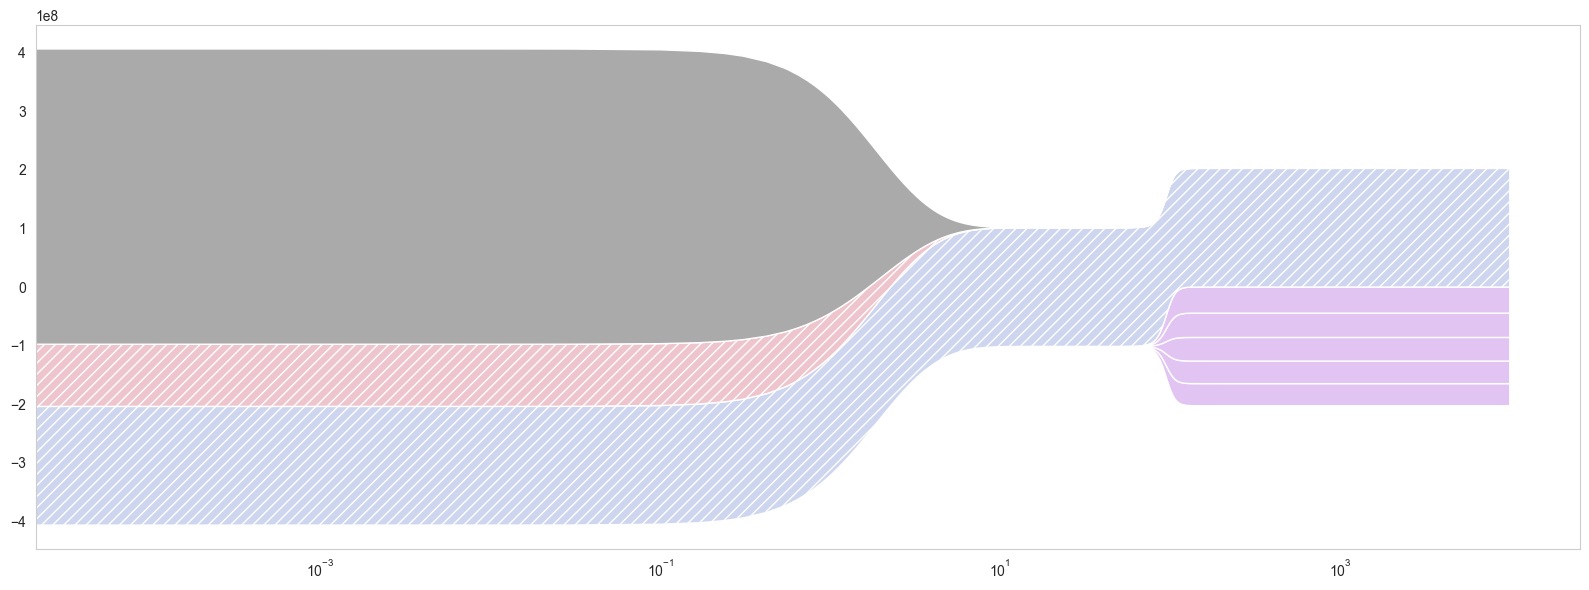

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
viz.abundance_plot(community_envB2, ax=ax, type_colors=type_colors, type_hatches=type_hatches, relative_abundance=False, stacked=True, baseline='sym', log_x_axis=True, log_y_axis=False)

<AxesSubplot: >

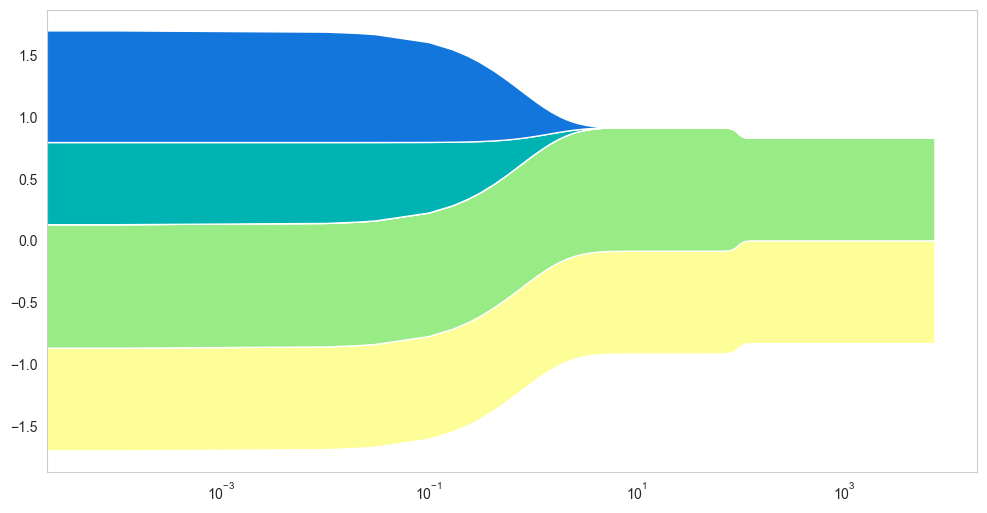

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
viz.resource_plot(community_envB2, ax=ax, stacked=True, relative=False, log_x_axis=True, log_y_axis=False)

# Scenario Phase A3

In [74]:
community_envA3 = community_envApf.sample(fraction=1.0).inoculate(community_envB2.sample(fraction=1.0))

In [75]:
# community_envA3.resource_set.influx_rate = np.array([1, 1, 0, 1, 1, 0, 0, 0, 0])

In [76]:
T_total = 1e4

In [77]:
community_envA3.run(T=T_total)

[ Transconjugant established at t=28.94 ]	001101000+100000000 --> 011001000
[ Transconjugant established at t=57.83 ]	001101000+100000000 --> 011001000
[ Transconjugant established at t=69.40 ]	001101000+100000000 --> 011001000
[ Transconjugant established at t=85.08 ]	001101000+100000000 --> 011001000
[ Transconjugant established at t=92.39 ]	001101000+100000000 --> 011001000
[ Transconjugant established at t=171.77 ]	001101000+100000000 --> 011001000


In [78]:
community_envA3.R_series

array([[9.04056106e-01, 9.04056106e-01, 9.04056106e-01, ...,
        9.04056106e-01, 9.04056106e-01, 9.04056106e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        9.04056072e-01, 9.04056102e-01, 9.04056106e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.38312298e-29, 6.20767091e-31, 5.78168374e-34],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [79]:
community_envA3.type_set.lineageIDs

['Apf[000]',
 'Apf[000].t1(dBpf[000]-t3(dAanc[000]-m1[010]-m1[110]-m1[111]))',
 'Apf[000].t2(dBpf[000]-t2(dAanc[000]-m1[010]-m1[110]-m1[111]))',
 'Apf[000].t3(dBpf[000]-t2(dAanc[000]-m1[010]-m1[110]-m1[111]))',
 'Apf[000].t4(dBpf[000]-t3(dAanc[000]-m1[010]-m1[110]-m1[111]))',
 'Apf[000].t5(dBpf[000]-t1(dAanc[000]-m1[010]-m1[110]-m1[111]))',
 'Apf[000].t6(dBpf[000]-t3(dAanc[000]-m1[010]-m1[110]-m1[111]))',
 'Bpf[000]',
 'Bpf[000].t1(dAanc[000]-m1[010]-m1[110]-m1[111])',
 'Bpf[000].t2(dAanc[000]-m1[010]-m1[110]-m1[111])',
 'Bpf[000].t3(dAanc[000]-m1[010]-m1[110]-m1[111])',
 'Bpf[000].t4(dAanc[000]-m1[010]-m1[110]-m1[111])',
 'Bpf[000].t5(dAanc[000]-m1[010]-m1[110]-m1[111])']

In [80]:
community_envA3.N_series

array([[1.06126039e+08, 1.06126039e+08, 1.06126039e+08, ...,
        1.06126040e+08, 1.06126040e+08, 1.06126040e+08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.73717335e+07, 9.73717032e+07, 9.73716993e+07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.08620153e+06, 6.08619964e+06, 6.08619940e+06],
       ...,
       [4.02935730e+07, 4.02935730e+07, 4.02935730e+07, ...,
        4.02935734e+07, 4.02935734e+07, 4.02935734e+07],
       [3.85511360e+07, 3.85511360e+07, 3.85511360e+07, ...,
        3.85511364e+07, 3.85511364e+07, 3.85511364e+07],
       [3.76758640e+07, 3.76758640e+07, 3.76758640e+07, ...,
        3.76758644e+07, 3.76758644e+07, 3.76758644e+07]])

In [81]:
cmapA = viz.lightdark_cmap('crimson', cmin=0.1, cmax=0.95, reverse=True)
cmapB = viz.lightdark_cmap('royalblue', cmin=0.1, cmax=0.95, reverse=True)
xconj_cmaps = [viz.lightdark_cmap(sns.color_palette('gnuplot2', as_cmap=True)(np.arange(0.45, 1.0, 0.1)[n-1]), cmin=0.1, cmax=0.95, reverse=True) for n in range(1, 7)]

In [82]:
type_colors, type_hatches = viz.type_styles_by_phylogeny(community_envA3.type_set, color_tags={'A': cmapA, 'B': cmapB, 't': {n+1: cmapT for n, cmapT in enumerate(xconj_cmaps)}}, hatch_tags={'s': '///', 'pf': '///'}, vmin=min(landscape.values()), vmax=max(landscape.values()), palette_depth=1 )

<AxesSubplot: >

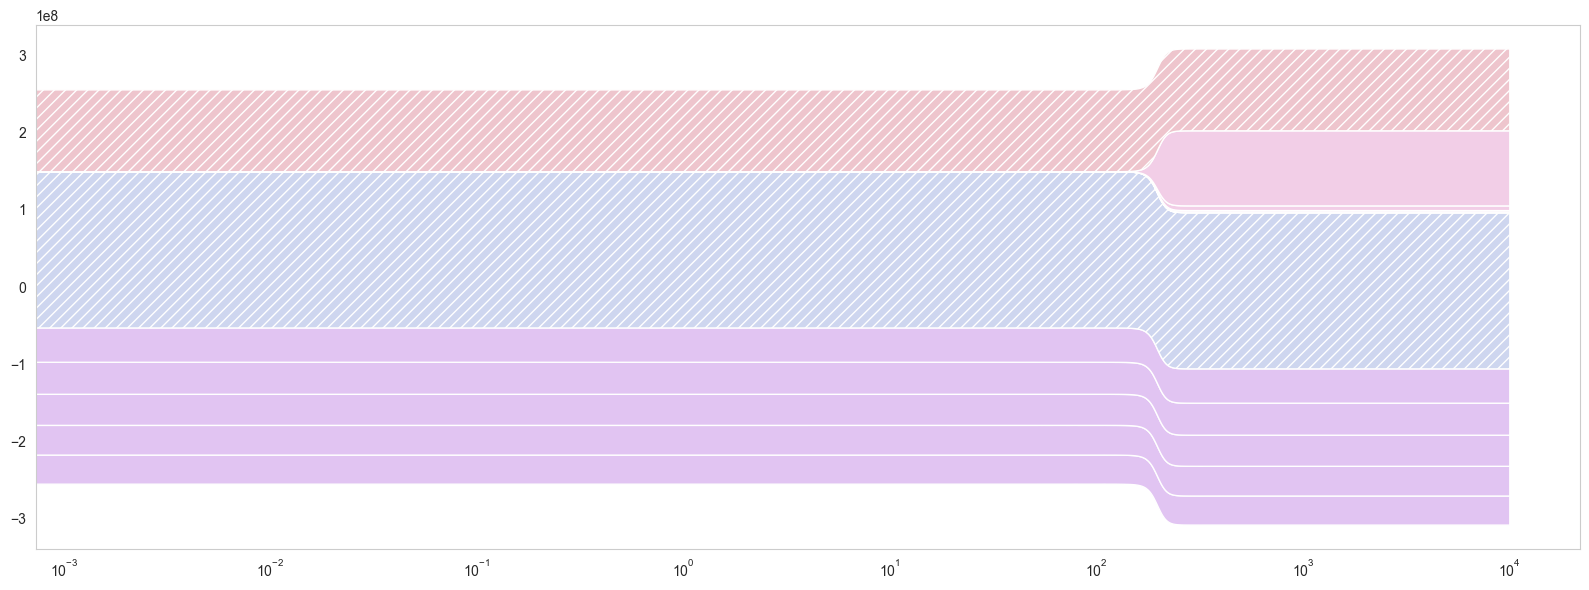

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
viz.abundance_plot(community_envA3, ax=ax, type_colors=type_colors, type_hatches=type_hatches, relative_abundance=False, stacked=True, baseline='sym', log_x_axis=True, log_y_axis=False)

<AxesSubplot: >

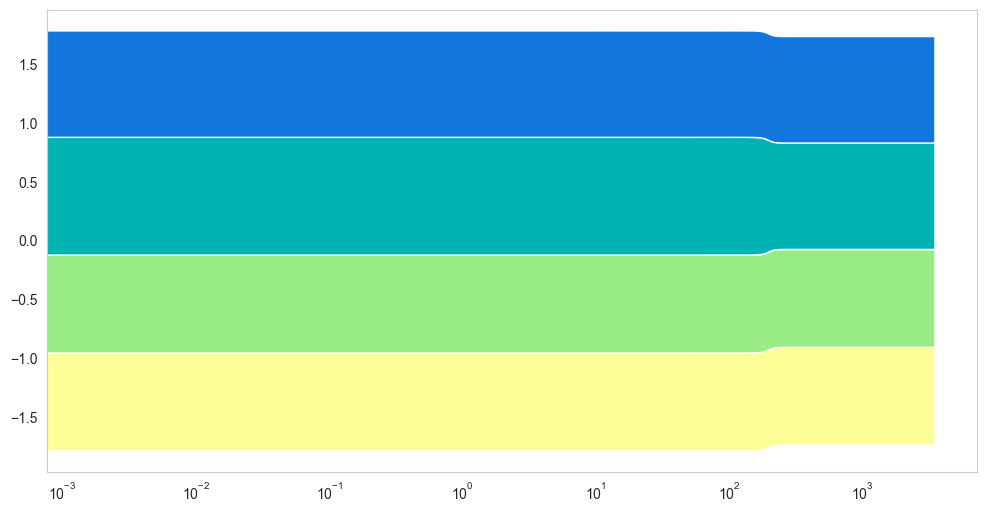

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
viz.resource_plot(community_envA3, ax=ax, stacked=True, relative=False, log_x_axis=True, log_y_axis=False)